# Pipeline

#### Tópicos da aula
- Transformers x Estimators
- Pipeline
- ColumnTransform

___________________________


[Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) é uma classe do sklearn que permite aplicar uma sequência de transformações em um estimador final. <br>
Para isso, os passos intermediários devem ter implementados métodos de `fit` e `transform` enquanto o estimador final só precisa ter o `fit` implementado. <br>
O propósito do `pipeline` é:
- reunir várias etapas para serem validadas de forma cruzada (cross-validation) ao definir parâmetros diferentes
- ajudar a criar códigos que possuam um padrão que possa ser facilmente entendido e compartilhando entre times de cientista e engenheiro de dados.

<img src=' 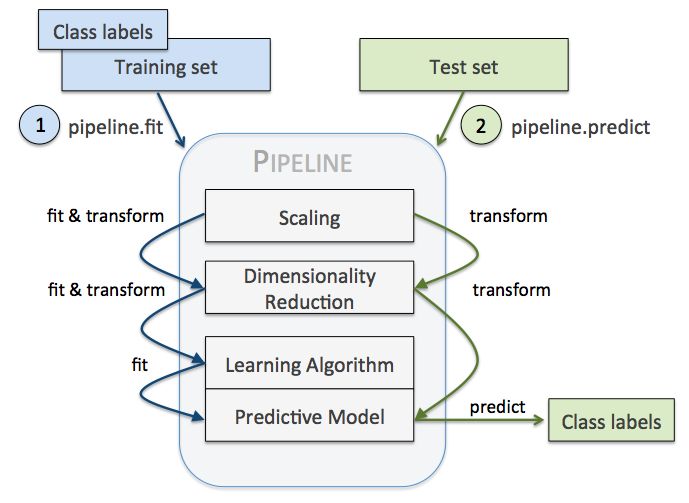' width=500>

- __Transformer:__ Um transformador se refere à um objeto de uma classe que possuim os métodos fit() e transform() e que nos ajudam a transformar o dado na forma que queremos. OneHotEncoder, SimpleImputer e MinMaxScaler são exemplos de transformers.
- __Estimator:__ Um estimador se refere à um algoritmo de ML. Ele é um objeto de uma classe que possui os métodos fit() e predict(). [Aqui](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) se encontram exemplos de estimadores.

Hoje vamos utilizar um dataset mais simples de exemplo. Usaremos os dados de gorjeta cuja descrição encontra-se.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df = df[df['body_mass_g'].notna()]

In [5]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

Dados Faltantes?

In [6]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
df.describe().loc['mean']

bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
Name: mean, dtype: float64

Primeiro vamos separar os numéricos e categóricos

In [8]:
features_num = df.select_dtypes(include=np.number).columns.tolist()
features_cat = df.select_dtypes(exclude=np.number).columns.tolist()

features_num.remove('body_mass_g')

features_num

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']

- SimpleImputer  
https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [11]:
data = imputer_mean.fit_transform(df[features_num])
data

array([[ 39.1,  18.7, 181. ],
       [ 39.5,  17.4, 186. ],
       [ 40.3,  18. , 195. ],
       ...,
       [ 50.4,  15.7, 222. ],
       [ 45.2,  14.8, 212. ],
       [ 49.9,  16.1, 213. ]])

In [12]:
from IPython.display import display

df_temp = pd.DataFrame(data, columns=features_num)
display(df[features_num].head())
display(df.describe().loc['mean'])
display(df_temp.head())

,bill_length_mm,bill_depth_mm,flipper_length_mm
0,39.1,18.7,181.0
1,39.5,17.4,186.0
2,40.3,18.0,195.0
4,36.7,19.3,193.0
5,39.3,20.6,190.0


bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
Name: mean, dtype: float64

,bill_length_mm,bill_depth_mm,flipper_length_mm
0,39.1,18.7,181.0
1,39.5,17.4,186.0
2,40.3,18.0,195.0
3,36.7,19.3,193.0
4,39.3,20.6,190.0


Pipeline?
- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

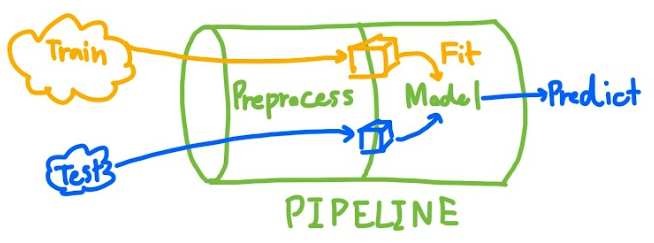

In [13]:
from sklearn.pipeline import Pipeline

In [14]:
X = df.drop(columns='body_mass_g', axis=1)
y = df['body_mass_g']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [16]:
X_train.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
sex                  5
dtype: int64

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
pipe_tr_features_num = Pipeline([
    ('tr_imput_mean', SimpleImputer(strategy='mean')),
    ('tr_min_max', MinMaxScaler())
])

In [19]:
# Só para ver o pipeline funcionando
pipe_tr_features_num.fit_transform(df[features_num])[0:4]

array([[0.25454545, 0.66666667, 0.15254237],
       [0.26909091, 0.51190476, 0.23728814],
       [0.29818182, 0.58333333, 0.38983051],
       [0.16727273, 0.73809524, 0.3559322 ]])

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
pipe_tr_features_cat = Pipeline([
    ('tr_input_frequent', SimpleImputer(strategy='most_frequent')),
    ('tr_dummy', OneHotEncoder(drop='first'))
])

Dá para usar um estimador(modelo) KNN para preencher os faltantes
- sklearn.impute.KNNImputer
- https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer

E como juntamos features numéricas e categóricas?
- ColumnTransformer  
https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

E como fica tudo junto?

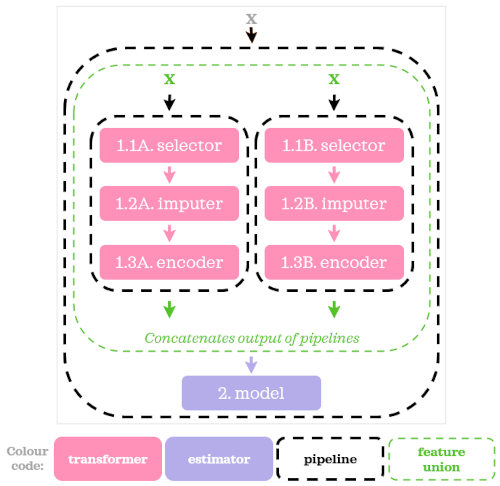

In [26]:
from sklearn.compose import ColumnTransformer

In [27]:
pre_processor = ColumnTransformer([
    ('tr_num', pipe_tr_features_num, features_num),
    ('tr_cat', pipe_tr_features_cat, features_cat)
])

In [32]:
pipe_final = Pipeline([
    ('pre_processor', pre_processor),
    ('est', KNeighborsRegressor(n_neighbors=8))
])

In [33]:
pipe_final.fit(X_train, y_train)

Pipeline(steps=[('pre_processor',
                 ColumnTransformer(transformers=[('tr_num',
                                                  Pipeline(steps=[('tr_imput_mean',
                                                                   SimpleImputer()),
                                                                  ('tr_min_max',
                                                                   MinMaxScaler())]),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm']),
                                                 ('tr_cat',
                                                  Pipeline(steps=[('tr_input_frequent',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('tr_dummy',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['species', 'island',
                                                   'sex'])])),
                ('est', KNeighborsRegressor(n_neighbors=8))])

In [34]:
y_pred = pipe_final.predict(X_test)

In [35]:
from sklearn.metrics import r2_score

In [36]:
print(f'R2: {r2_score(y_test, y_pred)}')

R2: 0.8666792278723384


## Bibliografia e Aprofundamento
- [Python Machine Learning Book](https://github.com/rasbt/python-machine-learning-book-3rd-edition)
- [Documentação](https://scikit-learn.org/stable/modules/compose.html)
- [ColumnTransformer](https://scikit-learn.org/stable/modules/compose.html#columntransformer-for-heterogeneous-data)
- [FeatureUnion](https://scikit-learn.org/stable/modules/compose.html#featureunion-composite-feature-spaces)
- https://medium.com/data-hackers/como-usar-pipelines-no-scikit-learn-1398a4cc6ae9
- [Pipelines e funções próprias: FuncionTransformer](https://towardsdatascience.com/using-functiontransformer-and-pipeline-in-sklearn-to-predict-chardonnay-ratings-9b13fdd6c6fd)
- [Custom Functions: Como criar classes e usá-las no pipeline](https://tiaplagata.medium.com/how-scikit-learn-pipelines-make-your-life-so-much-easier-3cfbfa1d9da6)
- [Pipeline com PySpark](https://www.analyticsvidhya.com/blog/2019/11/build-machine-learning-pipelines-pyspark/)